<a href="https://colab.research.google.com/github/lkostenko/python_da_homeworks/blob/main/Additional_hw_5_Data_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Додаткове завдання до модуля 4: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте бібліотеки matplotlib.pyplot, seaborn та pandas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [2]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [3]:
display(df_taxi.head(3), df_taxi.dtypes, df_taxi.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


,0
pickup,datetime64[ns]
dropoff,datetime64[ns]
passengers,int64
distance,float64
fare,float64
tip,float64
tolls,float64
total,float64
color,object
payment,object


(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

![](https://drive.google.com/uc?export=view&id=1rsgJvFEdXwGDTVl3CyyRL2ao8rzR_8P2)

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [4]:
df_taxi.isna().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,44


Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення.
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [66]:
df_taxi[df_taxi.dropoff_zone.isna()].head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.5,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.0,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.0,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.0,50.30,yellow,credit card,NaN,NaN,NaN,NaN


In [6]:
df_taxi[df_taxi.distance==0].head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
120,2019-03-21 17:21:44,2019-03-21 17:21:49,1,0.0,2.5,0.00,0.0,4.30,yellow,cash,JFK Airport,JFK Airport,Queens,Queens
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.5,166.00,yellow,credit card,NaN,NaN,NaN,NaN
670,2019-03-08 04:50:48,2019-03-08 04:51:07,1,0.0,2.5,0.00,0.0,6.30,yellow,cash,Lenox Hill East,Lenox Hill East,Manhattan,Manhattan
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.0,45.0,5.00,0.0,50.30,yellow,credit card,NaN,NaN,NaN,NaN


In [7]:
df_taxi[(df_taxi.distance == 0) & (df_taxi.tip > 5)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.0,80.0,20.08,0.00,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.0,120.0,33.20,12.50,166.00,yellow,credit card,NaN,NaN,NaN,NaN
1482,2019-03-10 20:27:25,2019-03-10 20:28:33,1,0.0,52.0,16.59,0.00,71.89,yellow,credit card,Lincoln Square East,Lincoln Square East,Manhattan,Manhattan
3221,2019-03-23 17:11:33,2019-03-23 17:11:50,2,0.0,52.0,12.21,5.76,73.27,yellow,credit card,Clinton East,Clinton East,Manhattan,Manhattan
3644,2019-03-19 23:30:50,2019-03-19 23:32:33,2,0.0,103.0,20.65,0.00,123.95,yellow,credit card,NaN,NaN,NaN,NaN
4118,2019-03-15 14:01:54,2019-03-15 14:01:59,1,0.0,25.0,5.06,0.00,30.36,yellow,credit card,NaN,NaN,NaN,NaN
5433,2019-03-01 17:53:56,2019-03-01 17:54:19,1,0.0,52.0,13.66,8.50,81.96,yellow,credit card,TriBeCa/Civic Center,TriBeCa/Civic Center,Manhattan,Manhattan


In [8]:
df_taxi[df_taxi.pickup_zone == "Lincoln Square East"].head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.52,8.0,1.00,0.0,13.30,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan
25,2019-03-25 08:01:01,2019-03-25 08:13:27,1,1.90,10.0,3.00,0.0,16.30,yellow,credit card,Lincoln Square East,Midtown South,Manhattan,Manhattan
45,2019-03-07 11:19:21,2019-03-07 11:39:09,1,0.80,12.5,3.15,0.0,18.95,yellow,credit card,Lincoln Square East,Midtown East,Manhattan,Manhattan
48,2019-03-07 16:49:01,2019-03-07 16:57:07,1,1.30,7.0,0.00,0.0,11.30,yellow,cash,Lincoln Square East,Times Sq/Theatre District,Manhattan,Manhattan
100,2019-03-28 11:28:29,2019-03-28 11:49:30,1,1.79,13.5,3.36,0.0,20.16,yellow,credit card,Lincoln Square East,Midtown South,Manhattan,Manhattan


Пропущенні значення в колонках можуть бути технічними помилками в процесі збору або введення даних.

Я вивела всі рядки, де колонка dropoff_zone має пропущені значення. Пропущені значення в цих колонках можуть бути пов'язані з ситуаціями, коли поїздка не була завершена в певній зоні чи районі. Наприклад, поїздка може мати не визначену кінцеву точку, через що інформація про зону або район висадки (dropoff) не була зібрана.

У багатьох рядках відсутнє значення у колонці payment, що означає відсутність даних про спосіб оплати. Це може бути якщо, наприклад, користувач вибрав спочатку один спосіб оплати, а після поїздки виконав оплату іншим методом. Може поїздка була оплачена готівкою, але ця інформацію не було внесена в систему

Також потім вивела всі рядки, де distance == 0. Я вважаю, що якщо distance == 0, а total!=0, то такі поїздки не відбулись. Вони могли кенсельнутись зі сторони пасажира або водія. Це можна прослідкувати по колонкам pickup and dropoff. При distance == 0, завичай між часом пікапу та дропофу проходить від кільох мілісекунд до декількох хвилин. В таких випадках зазвичай тотал == fare + податок(на мою думку). Можливо, в цих випадках total == cancelation fee.Зазвичай, це невеликі суми. Але є певні рядки, які відрізняються від цих (df_taxi[(df_taxi.distance == 0) & (df_taxi.tip > 5)]). В цих даних час пікапу також не сильно відрізняється від дропу.Знову ж таки, різниця від кільох мілісекунд до декількох хвилин. В цих даних видно, що локіції пікапу та дропу однакові, або ж NA. Тут може бути технічний збій або зона пікапу чи дропу виходить за межі зони системи. Я перевірила, чи є ще якісь поїздки, де пікап локація == Lincoln Square East (бо при фільтрації саме ця зона показувє 0 дистанцію). Як результат ми бачимо, що інші поїздки в цій зоні є, тому теорія про "зона пікапу чи дропу виходить за межі зони системи" неправдива.

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [9]:
df_taxi_clean = df_taxi.fillna('NA')

Після виконання завдання запустіть наступну клітинку:

In [10]:
df_taxi_clean.isna().sum()

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


Очікуваний результат виконання коду в попердній клітинці:

![](https://drive.google.com/uc?export=view&id=1G5_k_jmtNFFRdn7Kcw_fEoJyrkTeOGP4)

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`.
Якщо у Вас при завантаженні набору даних колонка `pickup`- вже в форматі `datetime64[ns]` - можете пропустити це завдання, або спробувати все ж таки написат функцію для трансформації.

Результат перетворення збережіть в тій самій колонці `pickup`.

In [11]:
df_taxi_clean.pickup.astype("datetime64[ns]")

,pickup
0,2019-03-23 20:21:09
1,2019-03-04 16:11:55
2,2019-03-27 17:53:01
3,2019-03-10 01:23:59
4,2019-03-30 13:27:42
...,...
6428,2019-03-31 09:51:53
6429,2019-03-31 17:38:00
6430,2019-03-23 22:55:18
6431,2019-03-04 10:09:25


Після виконання завдання запустіть наступну клітинку:

In [12]:
df_taxi_clean.pickup.head(3)

,pickup
0,2019-03-23 20:21:09
1,2019-03-04 16:11:55
2,2019-03-27 17:53:01


Очікуваний результат виконання коду в попердній клітинці:

![](https://drive.google.com/uc?export=view&id=106hQKdEhLV3OIeFsP8yvXLo0cKk6Jmqo)

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [13]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. УВАГА! Якщо хочете отримати підписи по осі ОХ як на прикладі, то графік необхідно будувати через `df.plot(...)`. Якщо у Вас будуть інші підписи осі ОХ - це ОК.

Після виведення графіку скажіть, чи бачите щось дивне на ньому? Важливо написати відповідь в цьому завданні словами.

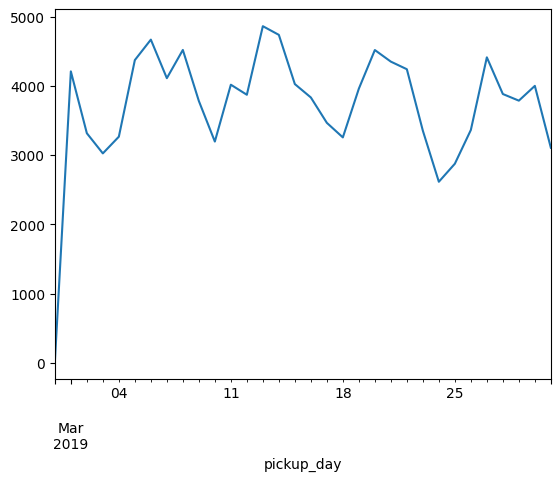

In [14]:
df_taxi_clean.groupby('pickup_day')["total"].sum().plot();


Приклад очікуваного графіку:

![](https://drive.google.com/uc?export=view&id=1t8yb_NNO2tfwDFDrBNl0BLJoYB0BsUK_)

У перші кілька днів місяця спостерігається аномально низька кількість платежів (навіть близька до нуля).
Можливо, це вказує на відсутність даних за ці дні або неповноту записів у наборі даних.

Потрібно перевірити, чи є записи у початковому наборі даних за ці дні.
Можливо, потрібно додатково очистити дані.

6.Виведіть кількість рядків для кожного pickup_day.

In [15]:
df_taxi_clean.groupby("pickup_day").size()

,0
pickup_day,
2019-02-28,1
2019-03-01,241
2019-03-02,198
2019-03-03,169
2019-03-04,171
2019-03-05,228
2019-03-06,257
2019-03-07,218
2019-03-08,235


Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

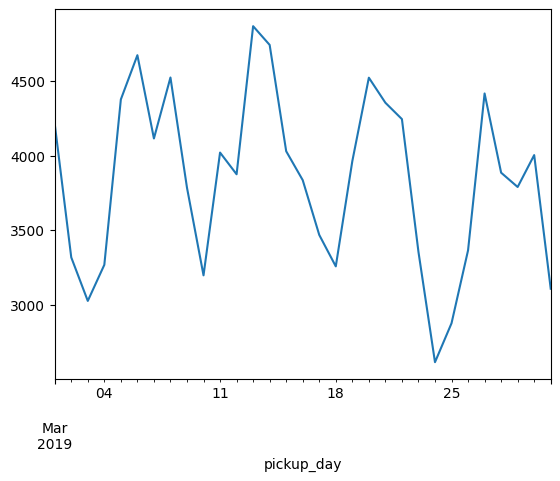

In [16]:
df_taxi_clean = df_taxi_clean[df_taxi_clean['pickup_day'] != '2019-02-28']
df_taxi_clean.groupby('pickup_day')["total"].sum().plot();

Очікуваний графік:

![](https://drive.google.com/uc?export=view&id=1RfSjsgr5991dlz5bVbfXl8tCnUZhFJ8B)

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [17]:
df_taxi_clean_grouped = df_taxi_clean.groupby(['pickup_day', 'pickup_borough'])["total"].sum().reset_index()

In [18]:
borough_pivot = df_taxi_clean_grouped.pivot(index='pickup_day', columns='pickup_borough', values='total')
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,NA,Queens
pickup_day,,,,,
2019-03-01,123.42,353.05,3169.47,14.60,553.29
2019-03-02,NaN,146.56,2716.33,NaN,456.13
2019-03-03,80.75,407.06,2100.23,10.55,428.73
2019-03-04,92.00,188.73,2026.17,NaN,962.18
2019-03-05,98.16,558.40,2981.26,NaN,739.56
2019-03-06,130.65,198.53,3501.07,10.00,833.36
2019-03-07,NaN,440.75,3087.82,NaN,587.13
2019-03-08,79.20,237.47,3408.85,18.35,780.34
2019-03-09,80.22,187.88,2967.71,38.26,511.73


Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

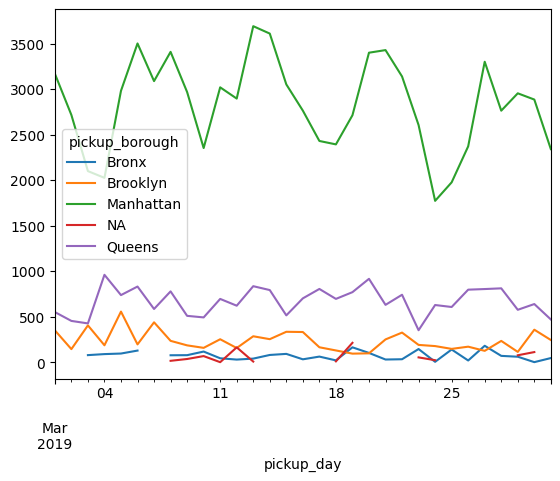

In [19]:
borough_pivot.plot();

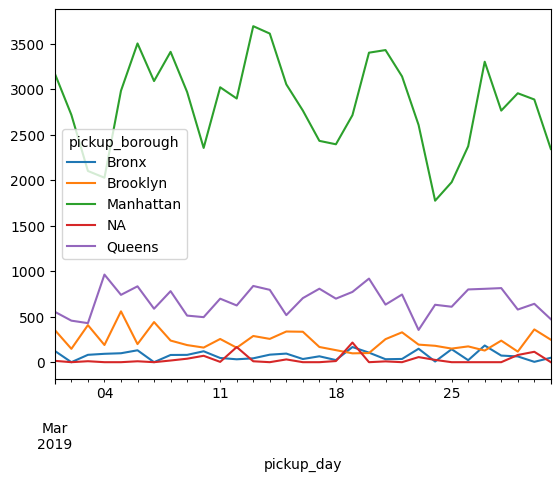

In [20]:
borough_pivot.fillna(0).plot();

З графіку видно, що в районі Manhattan найчастіше найбільша сума денних платежів за поїздки на таксі

Очікуваний графік :

![](https://drive.google.com/uc?export=view&id=1zhLnMdPCg54j2yzU1hRWv6wseSNPT1Oy)

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   

`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot` та побудову графіку через `<назва датафрейму>.<назва графіку>()` - тобто методом датафрейму з пандаса. Але графік можна побудувати також використовуючи цикл. Для тих, хто хоче потренуватись, рекомендую зробити обома способами.

Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

In [21]:
borough_pivot = borough_pivot.drop(columns=['NA'])
borough_pivot

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


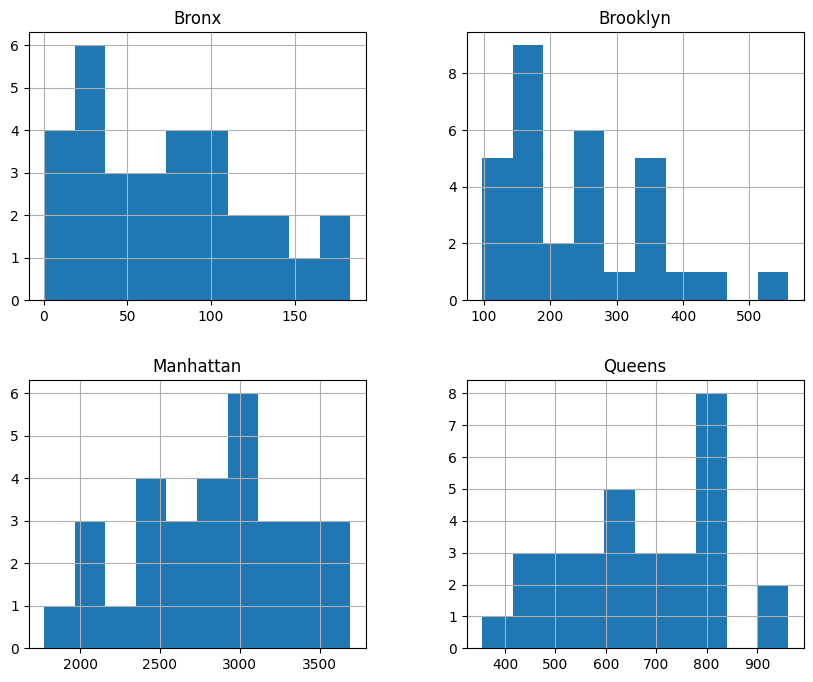

In [22]:
borough_pivot.fillna(0).hist(figsize=(10, 8));

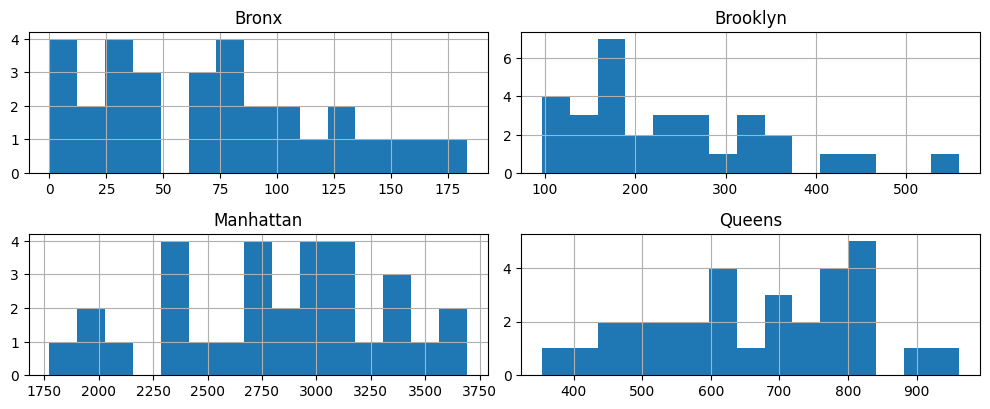

In [23]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(borough_pivot.fillna(0).columns):
    plt.subplot(4, 2, i+1)
    borough_pivot.fillna(0)[col].hist(bins = 15)
    plt.title(col)
plt.tight_layout();


Враховуючи, що ми працюємо з сумами платежів, для зручності та зрозумілості можна використати 15-20 бінів. Це дозволить  побачити загальні тенденції та розподіл без зайвого зниження або збільшення деталізації.

Приклад одного з правильних виконань завдання:

![](https://drive.google.com/uc?export=view&id=1AfkIgwUAtaDiYoiK6NBOqCHBdUngRz4z)

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

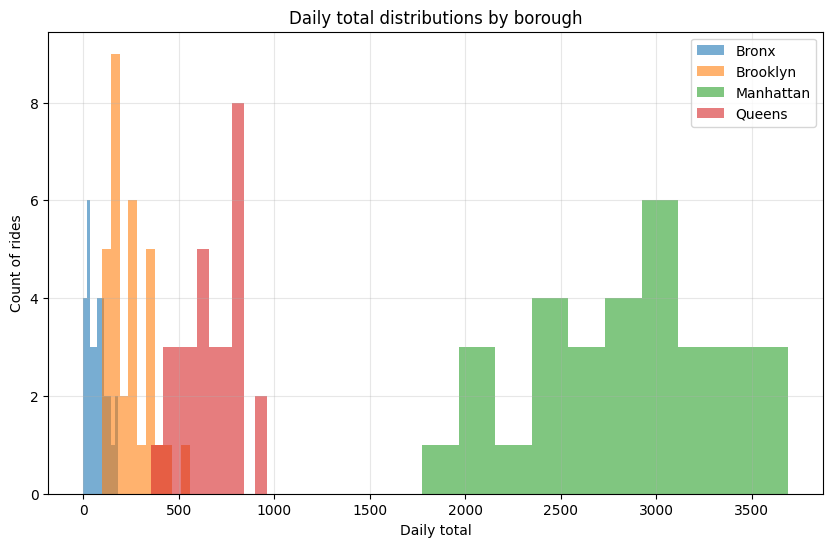

In [24]:
plt.figure(figsize=(10,6))
for col in borough_pivot.fillna(0).columns:
    plt.hist(borough_pivot.fillna(0)[col], bins=10, alpha=0.6, label=col)
plt.xlabel('Daily total')
plt.ylabel('Count of rides')
plt.grid(axis='both', alpha=.3)
plt.legend()
plt.title("Daily total distributions by borough")
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1J5PCLfVovNqeGxeeBGFUSS1Kqh6-UnwR)

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

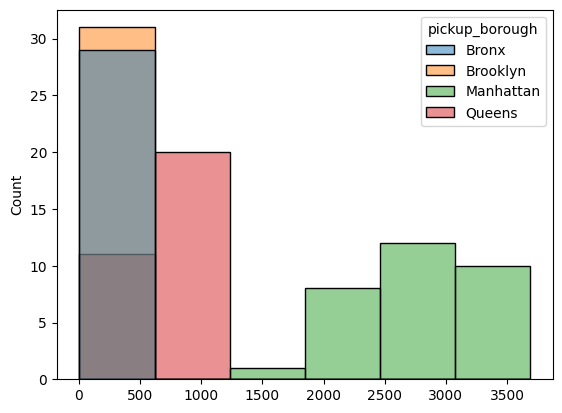

In [25]:
sns.histplot(data=borough_pivot, bins=6);

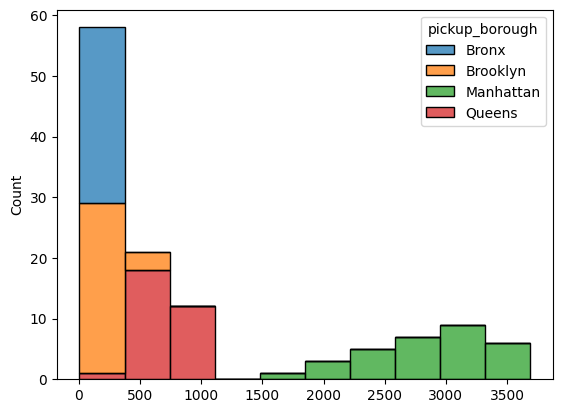

In [26]:
sns.histplot(data=borough_pivot, bins=10, multiple="stack");


10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:`
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури.
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен.

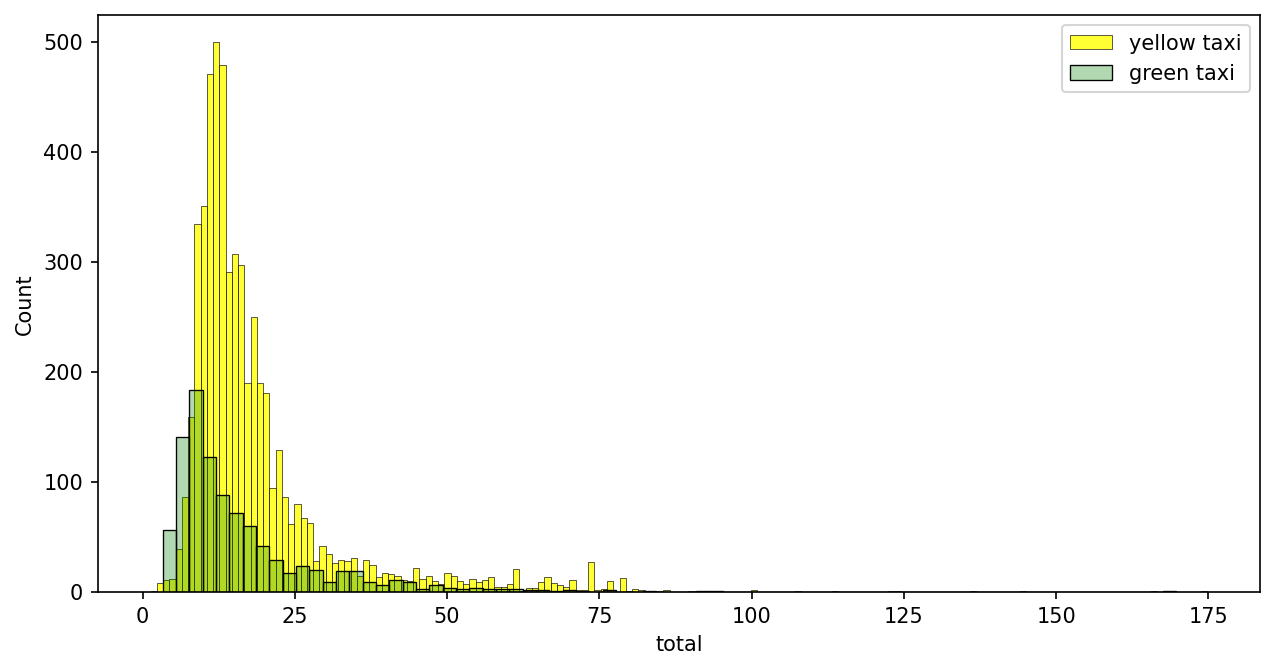

In [69]:
plt.figure(figsize=(10, 5), dpi=150)
sns.histplot(df_taxi_clean[df_taxi_clean["color"] == "yellow"], x="total", alpha = .8, color = "yellow", label = "yellow taxi")
sns.histplot(df_taxi_clean[df_taxi_clean["color"] == "green"], x="total", alpha = .3, color = "green", label = "green taxi")
plt.legend();


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=17j9hUAo0-65yEuCMHOHUlEW0nRqePOrW)

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати.

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :)

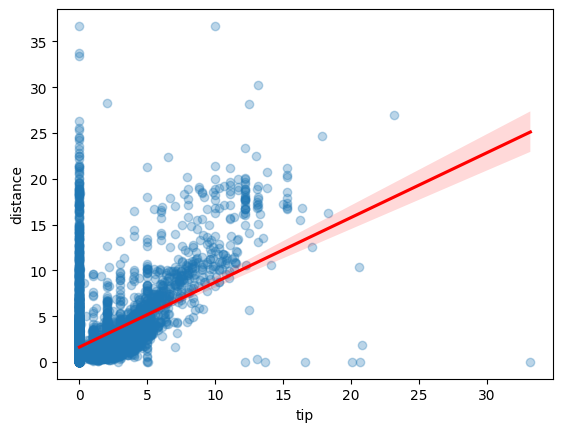

In [28]:
sns.regplot(x= df_taxi_clean.tip, y = df_taxi_clean.distance,  scatter_kws={"alpha": 0.3}, line_kws = {"color" : "red"} );

Один з можливих результатів (побудовано з seaborn):

![](https://drive.google.com/uc?export=view&id=19PtgLlPTJ1iR_AxcnBDZUw-U3Ulr6Cpy)

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

In [29]:
df_taxi_clean[df_taxi_clean["tip"] == 0][["tip", "distance"]].sort_values(by="distance", ascending=False)


,tip,distance
5364,0.0,36.70
4050,0.0,33.76
5648,0.0,33.46
2231,0.0,26.35
5567,0.0,25.51
...,...,...
6372,0.0,0.00
3238,0.0,0.00
5697,0.0,0.00
1690,0.0,0.00


Пряма лінія з точок, паралельна осі У, показує, що є поїздки, де відстань була не рівною 0, але тіпси не залишали.

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я.

Дайте відповіді на питання:
- при початку поїздки в якому районі **найнижчий середній розмір** чайових?
- а в поїздках з якого району **найвищий середній розмір** чайових?
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

In [30]:
df_taxi_clean.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2019-03-23
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,2019-03-04
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2019-03-27
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,2019-03-10
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,2019-03-30


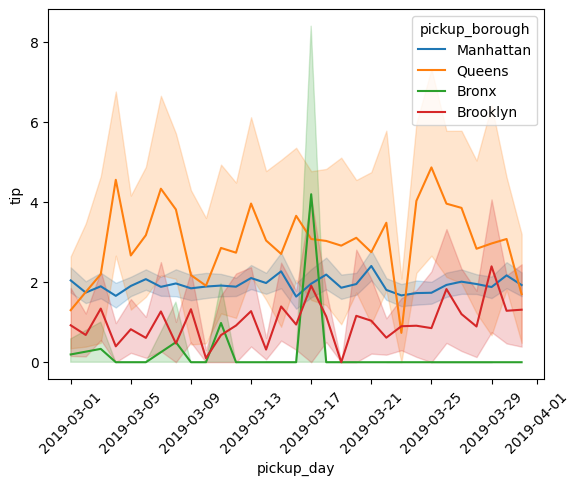

In [31]:
df_taxi_clean_filtered = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']
sns.lineplot(data=df_taxi_clean_filtered, x='pickup_day', y='tip', hue='pickup_borough')
plt.xticks(rotation=45);

Один з можливих результатів (побудовано з seaborn):

![](https://drive.google.com/uc?export=view&id=1yoEqYwNwyQmTTrkk_Mz6D-ruAvE-Sx8q)

При початку поїздки в районі Bronx найнижчий середній розмір чайових

В поїздках з району Queens найвищий середній розмір чайових

При проїздках з району Manhattan розмір чайових найстабільніший (найменше змінюється з дня у день)

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати.

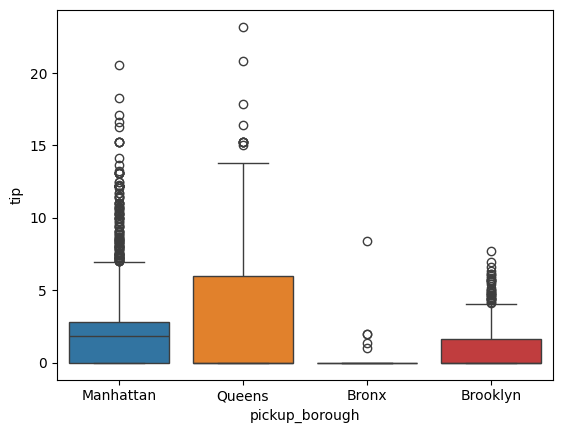

In [32]:
sns.boxplot(data=df_taxi_clean_filtered, x='pickup_borough', y='tip', hue='pickup_borough');

Один з можливих результатів (побудовано з seaborn):

![](https://drive.google.com/uc?export=view&id=1o6dFRTSj0gLQ_DMWeb7upqvuPNsL0MQc)

15.Творче завдання. Створіть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом?
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію.

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Без виконання цього завдання ДЗ не приймаєтья. Якщо є питання щодо виконання - пишіть у чат.

Знайдемо пікові години користування таксі у різних районах.

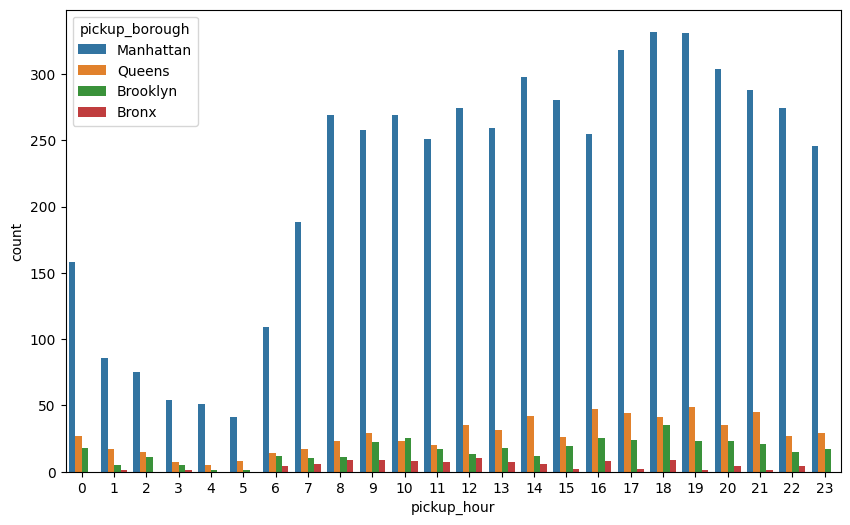

In [59]:
df_taxi_clean['pickup_hour'] = df_taxi_clean['pickup'].dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(data = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'],  x='pickup_hour', hue='pickup_borough');

З графіка видно, що найбільший попит на таксіспостерігається у вечірній час (17:00–19:00), що, ймовірно, пов'язано з закінченням робочого дня у всіх районах. Другий пік — у ранковий час (7:00–9:00), що відповідає початку робочого дня.
Манхеттен має найбільшу кількість поїздок у будь-який час доби.

Перевіримо залежність між оплатою за поїздку та часом доби, щоб оцінити вплив пікових годин на вартість.

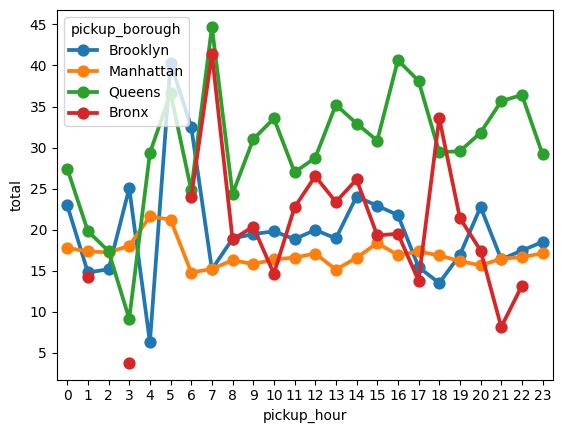

In [61]:
df_filtered = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA']
sns.pointplot(df_filtered.groupby(['pickup_hour', 'pickup_borough'])['total'].mean().reset_index(), x='pickup_hour', y='total', hue='pickup_borough');


Манхеттен має стабільний середній дохід протягом доби, що відображає його постійний високий попит на таксі.
Інші райони мають чіткі піки, які відповідають початку і кінцю робочого дня.

Перевіримо, чи впливає тип оплати на чайові:

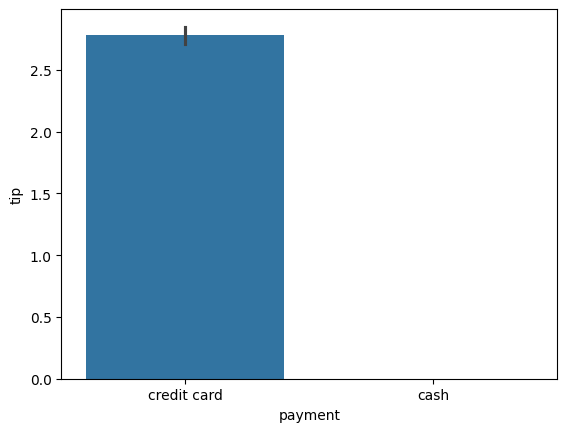

In [44]:
sns.barplot(x='payment', y='tip', data=df_taxi_clean[df_taxi_clean['payment'] != 'NA']);

Як видно з графіку, при оплаті готівкою люди або не залишають чайові, або ця інформація не вноситься в систему. Я також додатково вирішила це перевірити.

In [35]:
df_taxi_clean[(df_taxi_clean['payment'] == 'cash') & (df_taxi_clean['tip'] > 0)]

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_day,pickup_hour


Дійсно, можна побачити, що при розрахунку готівкою немає інформації про тіпси.

Далі я вирішила перевірити, чи впливає відстань на ціну поїздки:

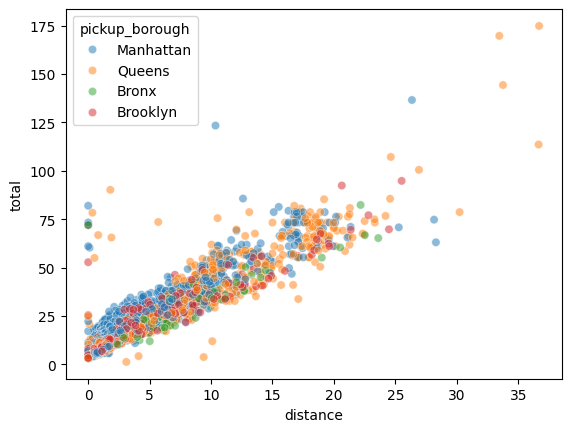

In [62]:
sns.scatterplot(data = df_filtered, x='distance', y='total', hue='pickup_borough', alpha=0.5);


Між відстанню і вартістю поїздки існує позитивна кореляція: зі збільшенням відстані зростає загальна вартість.
Більшість точок зосереджена в діапазоні відстаней до 10 і вартості до $50

Далі я зобразила більш інтерактивний графік, на якому навівши на точку, можна побачити більше деталей (яку відстань посажир проїхав на таксі, сума, район пікапу, рейт за милю, година, коли була здійснена посадка та чи профітна ця поїздка) та зробити висновки.

In [37]:
df_taxi_clean["rate_per_mile"] = df_taxi_clean.total / df_taxi_clean.distance
median_rate = df_taxi_clean["rate_per_mile"].median()
df_taxi_clean["profitability"] = df_taxi_clean["rate_per_mile"].apply(lambda x: 'Profitable' if x > median_rate else 'Non-profitable')


In [64]:
import plotly.express as px
px.scatter( df_filtered, x = 'distance', y = 'total', color = 'pickup_borough', hover_data = ['distance', 'total', 'pickup_borough', 'rate_per_mile', 'profitability', 'pickup_hour'])

Перевіримо середню вартість за милю у різних районах міста з розподілом по вигідності поїздок:

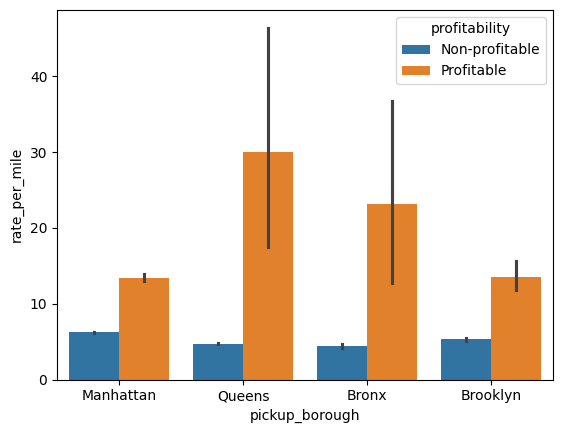

In [65]:
sns.barplot(data = df_taxi_clean[df_taxi_clean['pickup_borough'] != 'NA'], x="pickup_borough", y="rate_per_mile", hue="profitability");


Queens і Bronx мають найвищу середню вартість за милю серед Profitable поїздок , але також демонструють значний розкид, що вказує на можливість існування як дорогих, так і дешевих поїздок.
Manhattan і Brooklyn мають порівняно нижчу середню вартість за милю, але показують стабільність.